In [178]:
import matplotlib.pyplot as plt
import numpy as np
import torch

(0.02632281482219695, 1.99605533182621, 0.06674694269895554, 2.026655413210392)

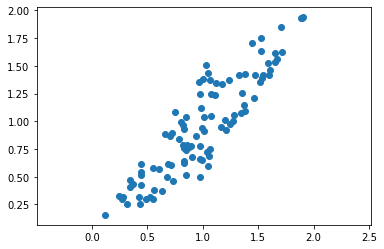

In [179]:
# make up some data 
D = 2
data= torch.rand(100,D)
data[:,0] = data[:,0] + data[:,1]
data[:,1] = 0.5*data[:,0] + data[:,1]

plt.scatter(data[:,0],data[:,1])
plt.axis('equal')

In [180]:
class AutoEncoder():
    def __init__(self):
        #Encoder weights/bias
        self.weightEncoder = torch.randn(D,1, requires_grad=True)
        self.biasEncoder = torch.randn(1, requires_grad=True)
        #Decoder weights/bias
        self.weightDecoder = torch.randn(1,D, requires_grad=True)
        self.biasDecoder = torch.randn(1,D, requires_grad=True)

    def forward(self, data):
        #encode data
        encode = self.encoder(data)
        #decode encoded data
        return self.decoder(encode)

    def encoder(self, data):
        #calculates the latent values
        return torch.matmul(data, self.weightEncoder) + self.biasEncoder

    def decoder(self, encode):
        #compute reconstruction values
        return torch.matmul(encode, self.weightDecoder) + self.biasDecoder

In [181]:
def train_AE(data, model, optimizer, loss_function, epochs=1000):
    loss_values = [] # collect loss

    for step in range(epochs):
        #Gradient
        optimizer.zero_grad()

        #Forward
        AE_forward = model.forward(data)

        #Calculate and collect loss value
        loss = loss_function(AE_forward, data)
        loss_values.append(loss.item())

        #Back propagation
        loss.backward()

        #Update weights
        optimizer.step()
        
    return loss_values
    

In [182]:
def displayAE(model, optimizer, graph_title):
    # Set loss function
    loss_function = torch.nn.MSELoss()
    loss_collection = train_AE(data, model, optimizer, loss_function)

    # Learning curve in graph
    plt.title(graph_title)
    plt.plot(range(1, 1001), loss_collection)
    plt.show()
    
    # Scatter plot (original and reconstructed)
    plt.title('Original data and the reconstructed data ')
    #original
    plt.scatter(data[:,0],data[:,1], color="blue")
    reconstructed = model.forward(data)
    #reconstructed
    plt.scatter(reconstructed.detach().numpy()[:,0],reconstructed.detach().numpy()[:,1], color="green")
    plt.plot([0,model.weightEncoder.detach().numpy()[0,0]], [0,model.weightEncoder.detach().numpy()[1,0]],'-r')
    plt.axis('equal')
    plt.show()

    ratio = np.divide(model.weightEncoder.detach().numpy(), model.weightDecoder.detach().numpy())
    print('Ratio: ', ratio[0,0], ' : ', ratio[0,1])


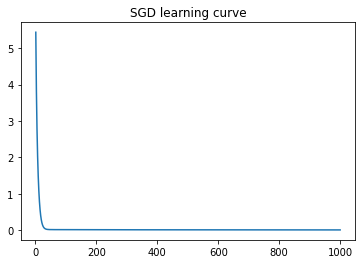

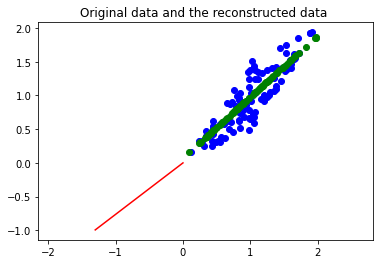

Ratio:  2.8239079  :  3.1103106


In [183]:
#contructing auto encoder
model1 = AutoEncoder()
# SGD, learning rate 0.01, no momentum, and 1000 steps (from a random start)
optimizer1 = torch.optim.SGD([model1.weightEncoder, model1.biasEncoder, model1.weightDecoder, model1.biasDecoder],lr=0.01, momentum=0)
displayAE(model1, optimizer1, 'SGD learning curve')

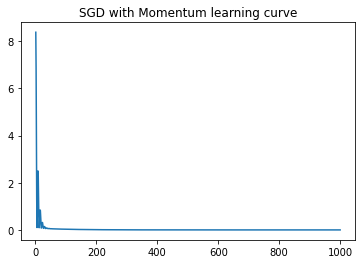

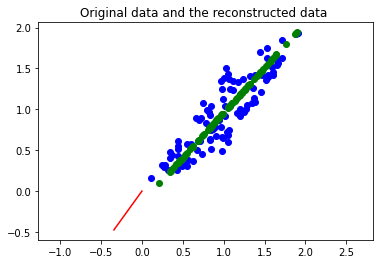

Ratio:  0.2978351  :  0.27111882


In [184]:
#contructing auto encoder
model2 = AutoEncoder()

# SGD, learning rate 0.01, 0.9 momentum, and 1000 steps (from a random start)
optimizer2 = torch.optim.SGD([model2.weightDecoder, model2.biasDecoder, model2.weightDecoder, model2.biasDecoder], lr=0.01, momentum=0.9)
displayAE(model2, optimizer2, 'SGD with Momentum learning curve')

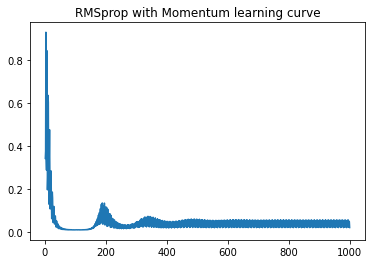

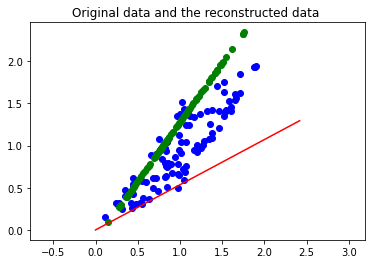

Ratio:  9.982055  :  7.1311913


In [185]:
#contructing auto encoder
model3 = AutoEncoder()

# RMSprop , learning rate 0.01, momentum=0.9, and 1000 steps (from a random start).
optimizer3 = torch.optim.RMSprop([model3.weightDecoder, model3.biasDecoder, model3.weightDecoder, model3.biasDecoder], lr=0.01, momentum=0.9)
displayAE(model3, optimizer3, 'RMSprop with Momentum learning curve')

## Interpreting the results

### Learning curve
A learning curve shows how error changes as the training set size increases.
From the above models we observe that the learning curve for all the graphs demonstrates that covergence occurs very quickly after the first few steps.  
For the SGD with no momentum, the loss value is consistent after the initial drop, thus it gradually slopes towards 0.
For SDG and RMSprops learning curve with momentum the momentum of 0.9 accelerates the gradient vector in the correct direction - this results in faster convergence.
The rate of convergence for the SGD with no momentum is already quite efficient and even more so with momentum however we observe a small bump at the start of the learning curve of models with momentum. This is likely caused by overshooting of the goal or steps being made in the wrong direction, additionally momentum can travel upwards slightly (this is to get out of the local optima).

When observing the learning curve graph we can determine that the ranking based on the rate of convergence is SGD with momentum followed by SGD without momentum then RMS with momentum.

### Reconstruction data
The reconstructed data is the result of the original data being passed through a linear autoencoder - in this process the data is encoded and then decoded. This is represented by the green plots on each model's scatter plot when can be compared to the orginal data which is plotted in blue.
From the scatter plot we can observe that the reconstructed data sits on a straight (diagonal) line. This is because the decoder has a linear equation ((w1*x1) + (w2*x2) + b). Although the reconstructed data may not directly reflect the original data we can observe that the reconstructed data is modeled after the original data's gradient.

### Encoder weights line
The origin to the vector is represented by the red line, this is formed using the two learned encoder weights. 
This line demonstrates the rotation of reconstructed data shape on the scatter plot. 